Default Of Credict Card Client: Machine Learning Project

Prepared by:Seeniya George

Organization:Entri Elevate

Created Date:01/01/2025

Problem Statement Financial institutions face challenges in managing credit risk due to client defaults. Using the Default of Credit Card Clients Dataset, the goal is to build a machine learning model to:

Objective:

Predict the likelihood of a client defaulting on their credit card payments.
Provide actionable insights to improve lending decisions and risk-based pricing

The project aims to:

Develop a classification model to predict whether a client will default.
Use model predictions to categorize clients into low, medium, and high-risk groups.
Interpret feature importance to derive actionable business insights.

Dataset Overview

Data Source: UCI Machine Learning Repository link: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

The Default of Credit Card Clients Dataset contains:

30,000 records of credit card clients.

Features include demographic, financial, and behavioral attributes (e.g., age, credit limit, payment history).

Target variable: default payment next month (1 = default, 0 = no default).

Limit Balance: The limit balance of the amount of credit given in dollars

Sex : gender (1=male, 2=female)

Education_Level : Education level (1 = Graduate school, 2 = University,

3 = High School, 4 = others, 5=Unknown, 6=Unknown)

Marital_Status : Marital status (1 = married, 2 = single, 3 = others)

Age : age or age in years

pay_0 : Payment status in September 2005 (-2 = no consumption, -1 = pay fairly,
0 = use of revolving credit, 1 = late payment for one month, 2 = late payment for two months, … 8 = late payment for eight months, -9 = late payments for nine months and over)

pay_2 : Payment status in August 2005 
pay_3 : Payment status in July 2005 
pay_4 : Payment status in June 2005 
pay_5 : Payment status in May 2005 
pay_6 : Payment status in April 2005 

bill_amt_1 : Total bill for September 2005 
bill_amt_2 : Total bill for August 2005 
bill_amt_3 : Total bill for July 2005 
bill_amt_4 : Total bill for June 2005 
bill_amt_5 : Total bill for May 2005 
bill_amt_6 : Total bill for April 2005 

pay_amt_1 : Amount of previous payment in September 2005 
pay_amt_2 : Amount of previous payment in August 2005 
pay_amt_3 : Amount of previous payment in July 2005 
pay_amt_4 : Amount of previous payment in June 2005 
pay_amt_5: Amount of previous payment in May 2005 
pay_amt_6: Amount of previous payment in April 2005 


default_payment_next_month: default payment next month (1=yes, 0=no)
It is hoped that it will produce an analysis that can provide information from the credit card system for the consideration of users in using credit card services. Or as an evaluation of credit card service providers

Importing libraries...

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score 


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                              classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [102]:
print("Loading default of credict card client...")
data=pd.read_csv('credit_customer.csv')
data.head(10)

Loading default of credict card client...


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [103]:
df=pd.DataFrame(data)

Display the shape of the data Set (Column,Row)

In [6]:
df.shape

(30000, 25)

 Display information about the dataset, including the number of non-null entries and data

In [7]:
#Basic Data Analysis

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
# Checking for Duplicates
df.duplicated().sum()

0

In [ ]:
There are no duplicated values

In [9]:
#Checking for null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
There are no null values present.

In [10]:
# Getting data types of each columns
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [101]:
#Display numarical columns
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,376.810915,1.603733,1.853133,1.551867,5.992019,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,152.550143,145.650891,141.494476,49.430110,48.540057,44.652885,41.675650,41.668585,41.144481,0.221200
std,158.059662,0.489129,0.790349,0.521970,0.738376,1.123802,1.197186,1.196868,1.169139,1.133187,...,115.532456,112.303494,112.616690,32.471990,32.668110,32.295085,31.344362,31.564369,31.978175,0.415062
min,100.005000,1.000000,0.000000,0.000000,4.690416,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,223.609034,1.000000,1.000000,1.000000,5.385165,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,49.000000,43.197222,36.878178,31.638584,28.879058,19.773720,17.233688,15.921660,10.897229,0.000000
50%,374.167075,2.000000,2.000000,2.000000,5.916080,0.000000,0.000000,0.000000,0.000000,0.000000,...,138.090550,134.638405,130.885446,45.836667,44.833024,42.438190,38.742741,38.742741,38.742741,0.000000
75%,489.898969,2.000000,2.000000,2.000000,6.480741,0.000000,0.000000,0.000000,0.000000,0.000000,...,233.579751,224.096519,221.928479,70.760158,70.717749,67.126746,63.358109,63.501968,63.253458,0.000000
max,724.569527,2.000000,6.000000,3.000000,7.842194,8.000000,8.000000,8.000000,8.000000,8.000000,...,364.384241,350.475035,348.012392,104.957134,106.073088,103.336828,97.929184,98.493655,99.117985,1.000000


In [8]:
#.Data Preprocessing
print("\nPerforming Preprocessing procedure...")


Performing Preprocessing procedure...


In [11]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
#removing data columns form dataset

df.drop(columns=['ID'],inplace=True)
print('Dataframe after removing date column permently\n')
df.head()

Dataframe after removing date column permently



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Minimum and maximum Age of customer

In [12]:
df['AGE'].min()

21

In [13]:
df['AGE'].max()

79


Exploratory Data Analysis (EDA)

In this part of the analysis, we will explore and prepare the dataset for modeling by performing the following tasks:

Distribution of Numerical Columns:
We will plot the distribution of the numerical features to understand their spread and identify any skewness or anomalies in the data.

Checking and Handling Outliers:
Outliers can distort the performance of many machine learning models. We will visualize and handle outliers by using boxplots and other statistical methods.

Handling Skewness:
Features with high skewness can impact model accuracy. We will check for skewness in the dataset and apply appropriate transformations (e.g., logarithmic or power transformations) to reduce it.

Correlation Analysis:
We will analyze the correlation between numerical features using a heatmap to identify the most influential features and relationships in the data.
Through this process, we aim to clean the data, reduce noise, and make it ready for model training.

Visualizing Outlayers

In [14]:
#outliyers
numeric_columns =  df.select_dtypes(include = ['number'])

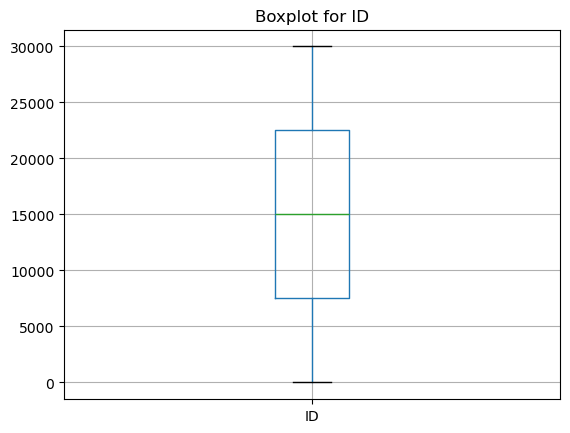

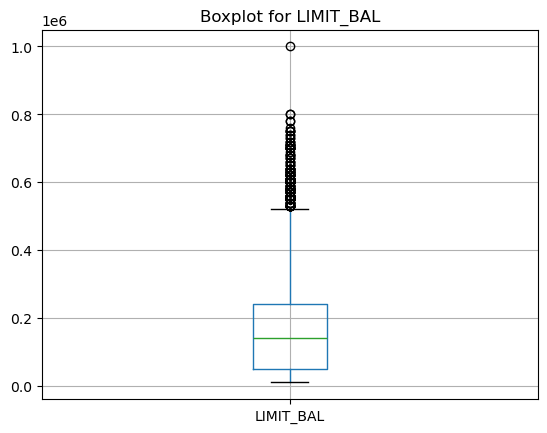

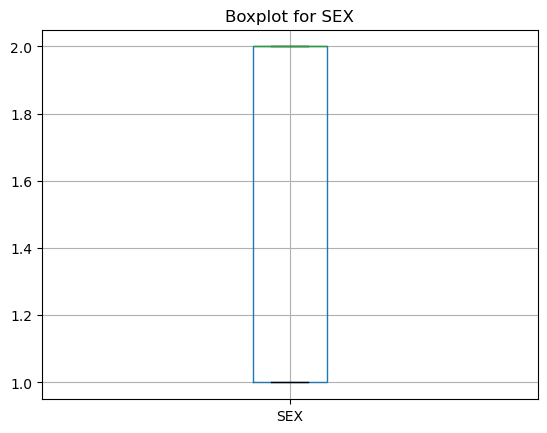

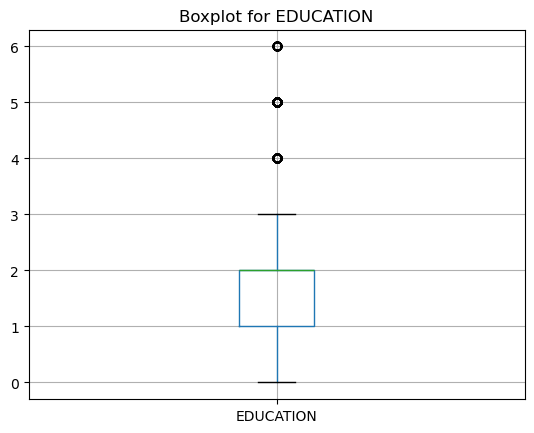

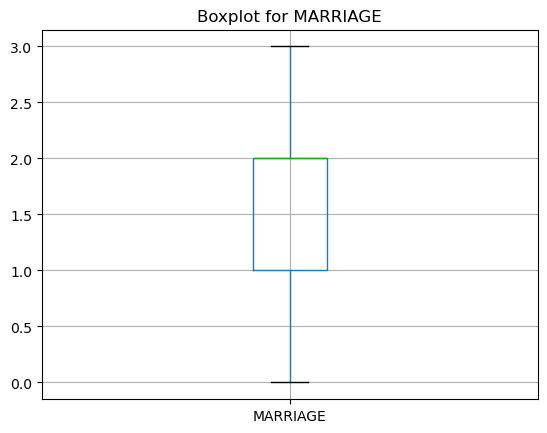

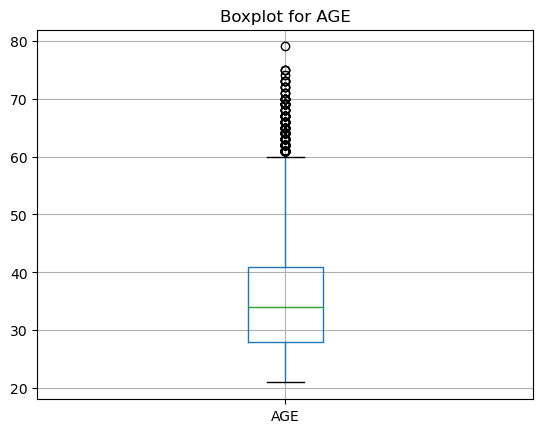

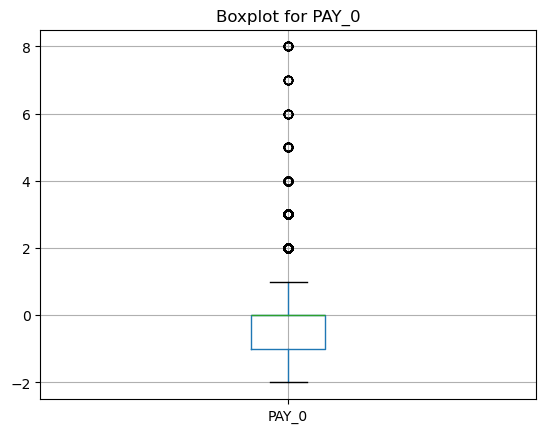

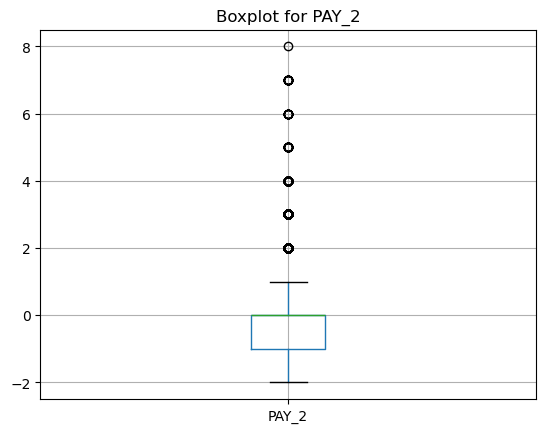

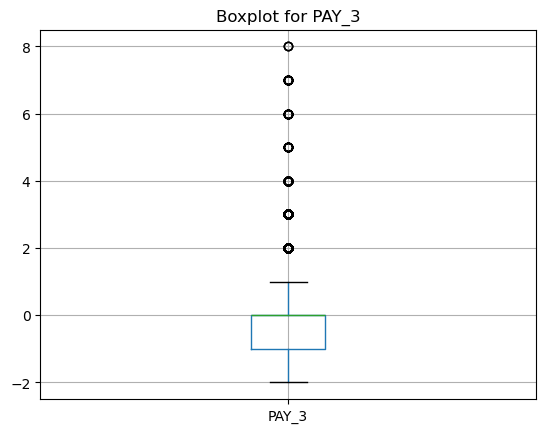

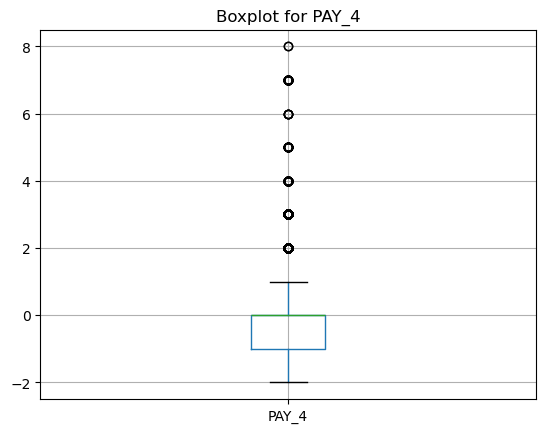

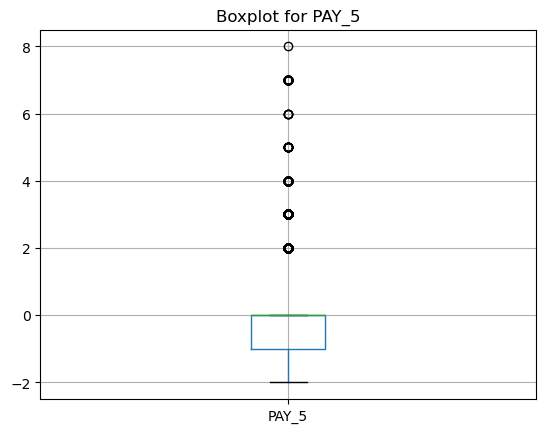

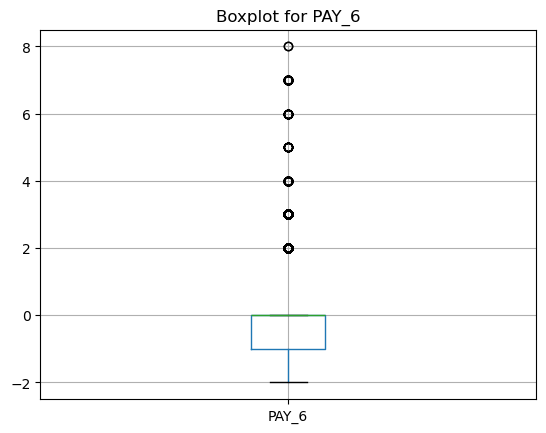

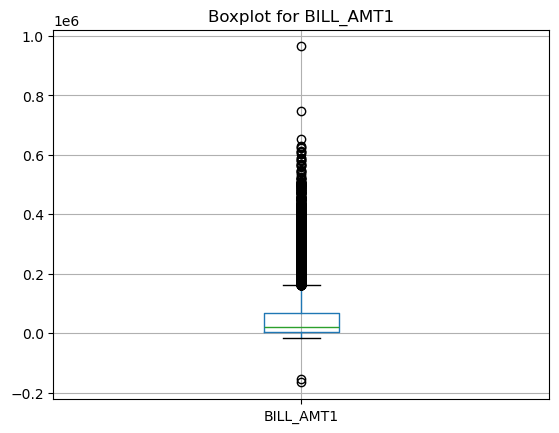

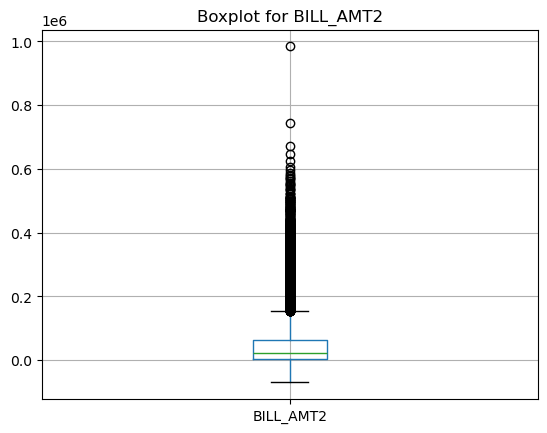

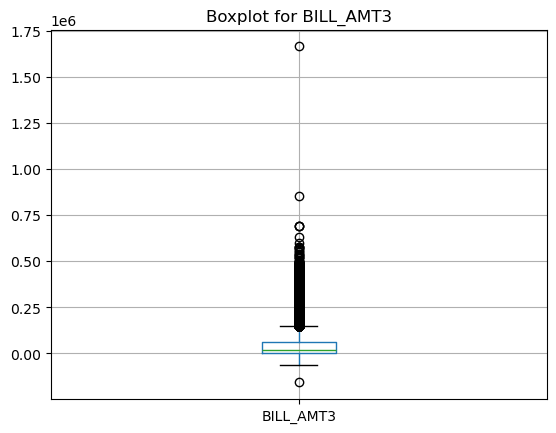

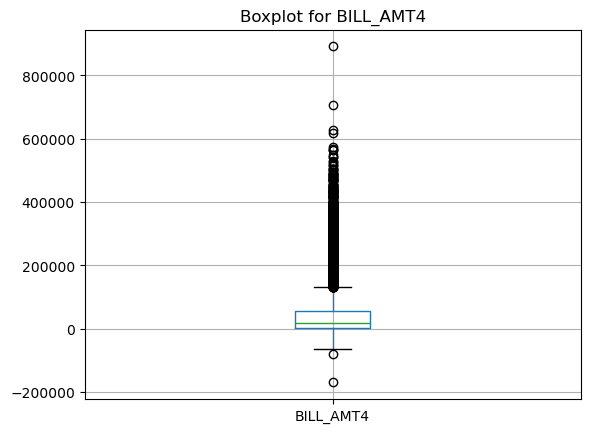

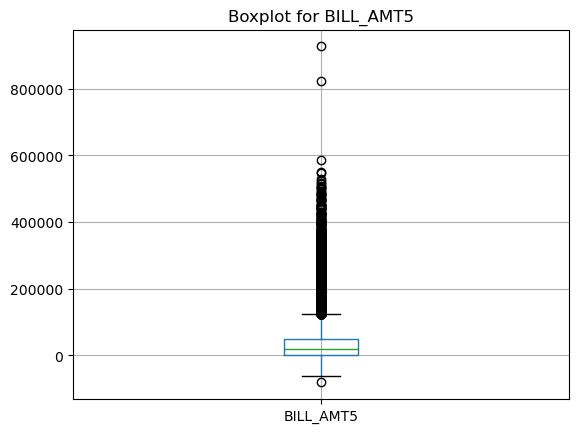

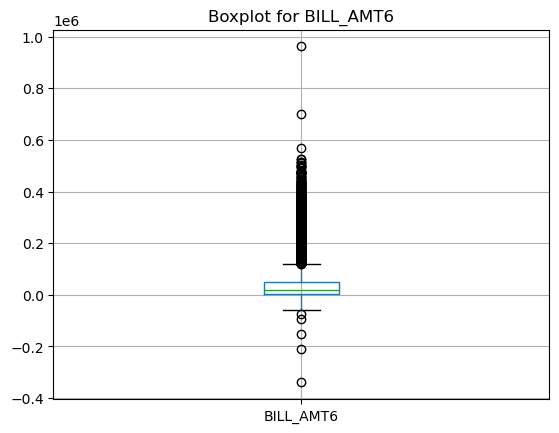

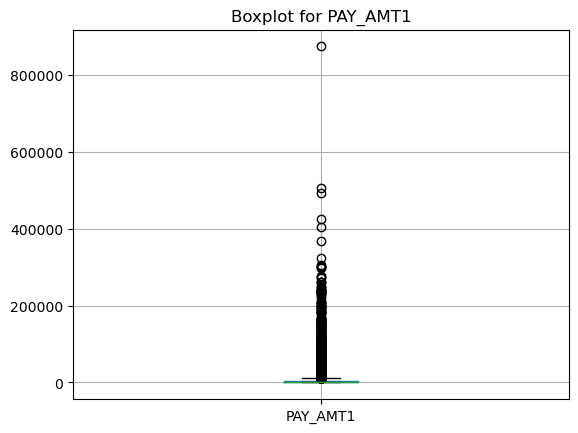

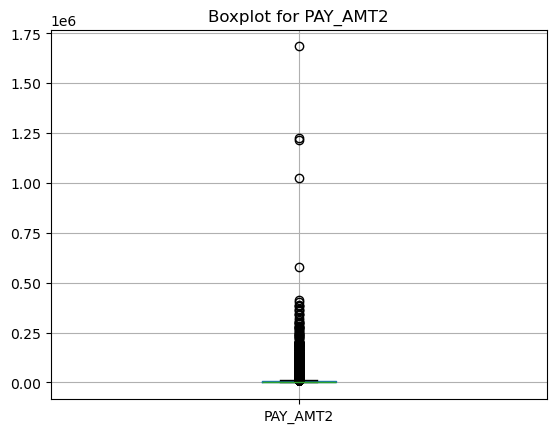

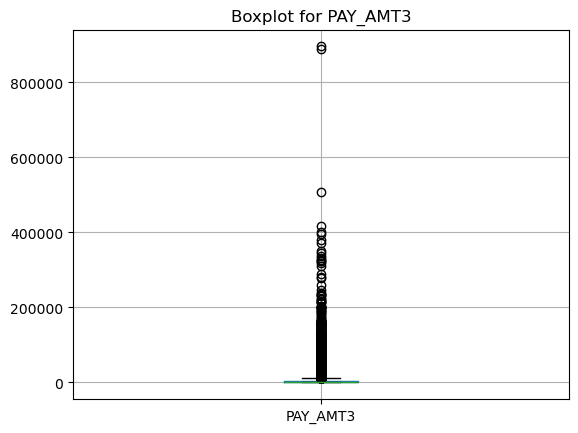

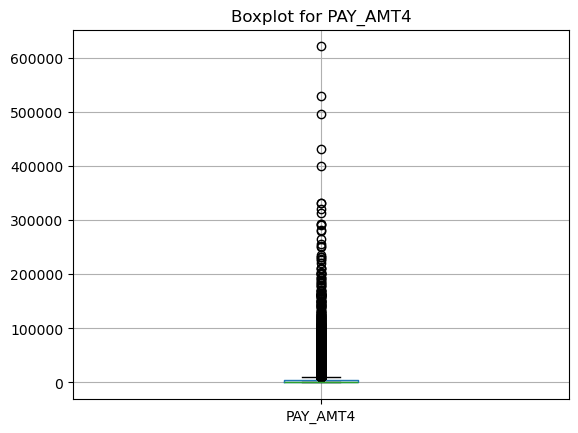

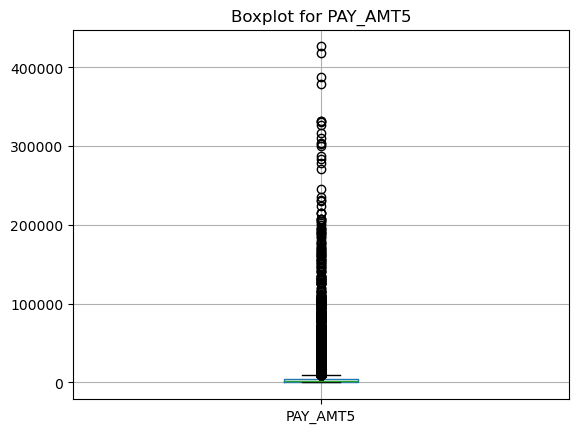

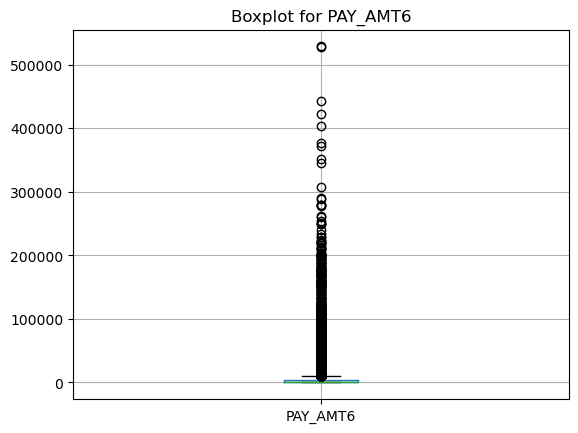

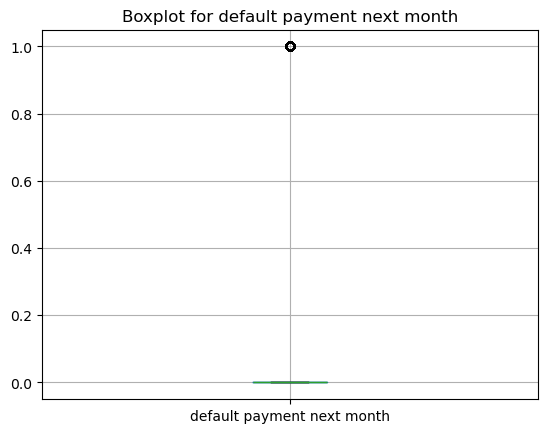

In [15]:
#forloop
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Boxplot for {column}")

Outlier Fixing has been handled Using IQR method

In [17]:
outlier_fix_columns = [ 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

IQR method to fixing outliers

In [18]:
# Fix Outliers using the IQR method
for column in outlier_fix_columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower whisker
    upper_bound = Q3 + 1.5 * IQR    # Upper whisker
    
    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

After fixing outlier to boxplot

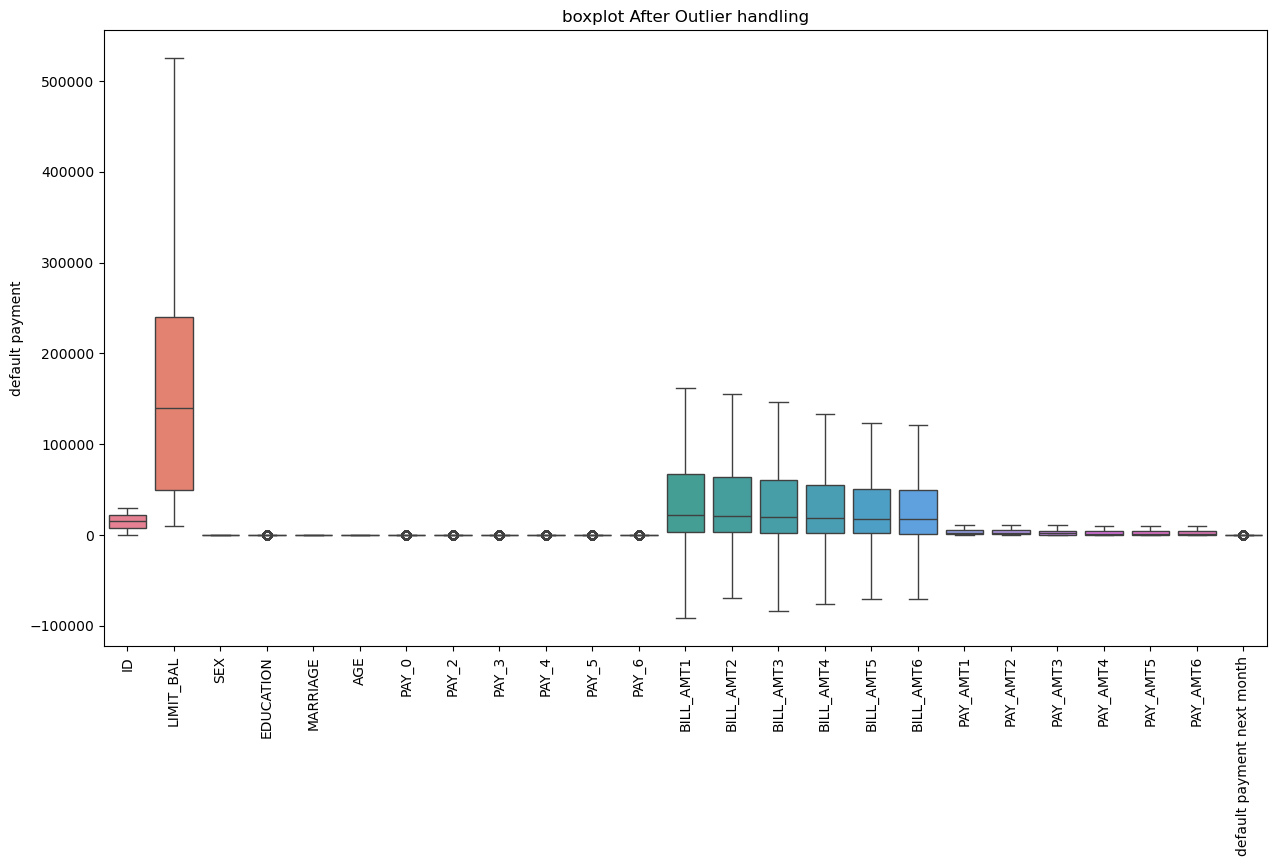

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(df)
plt.title("boxplot After Outlier handling")
plt.xticks(rotation=90)
plt.ylabel('default payment')
plt.show()

In [20]:
df[outlier_fix_columns].skew()

LIMIT_BAL    0.904504
AGE          0.654467
BILL_AMT1    1.194178
BILL_AMT2    1.189649
BILL_AMT3    1.184730
BILL_AMT4    1.183997
BILL_AMT5    1.184657
BILL_AMT6    1.199718
PAY_AMT1     1.032414
PAY_AMT2     1.113399
PAY_AMT3     1.200528
PAY_AMT4     1.176348
PAY_AMT5     1.183906
PAY_AMT6     1.211015
dtype: float64

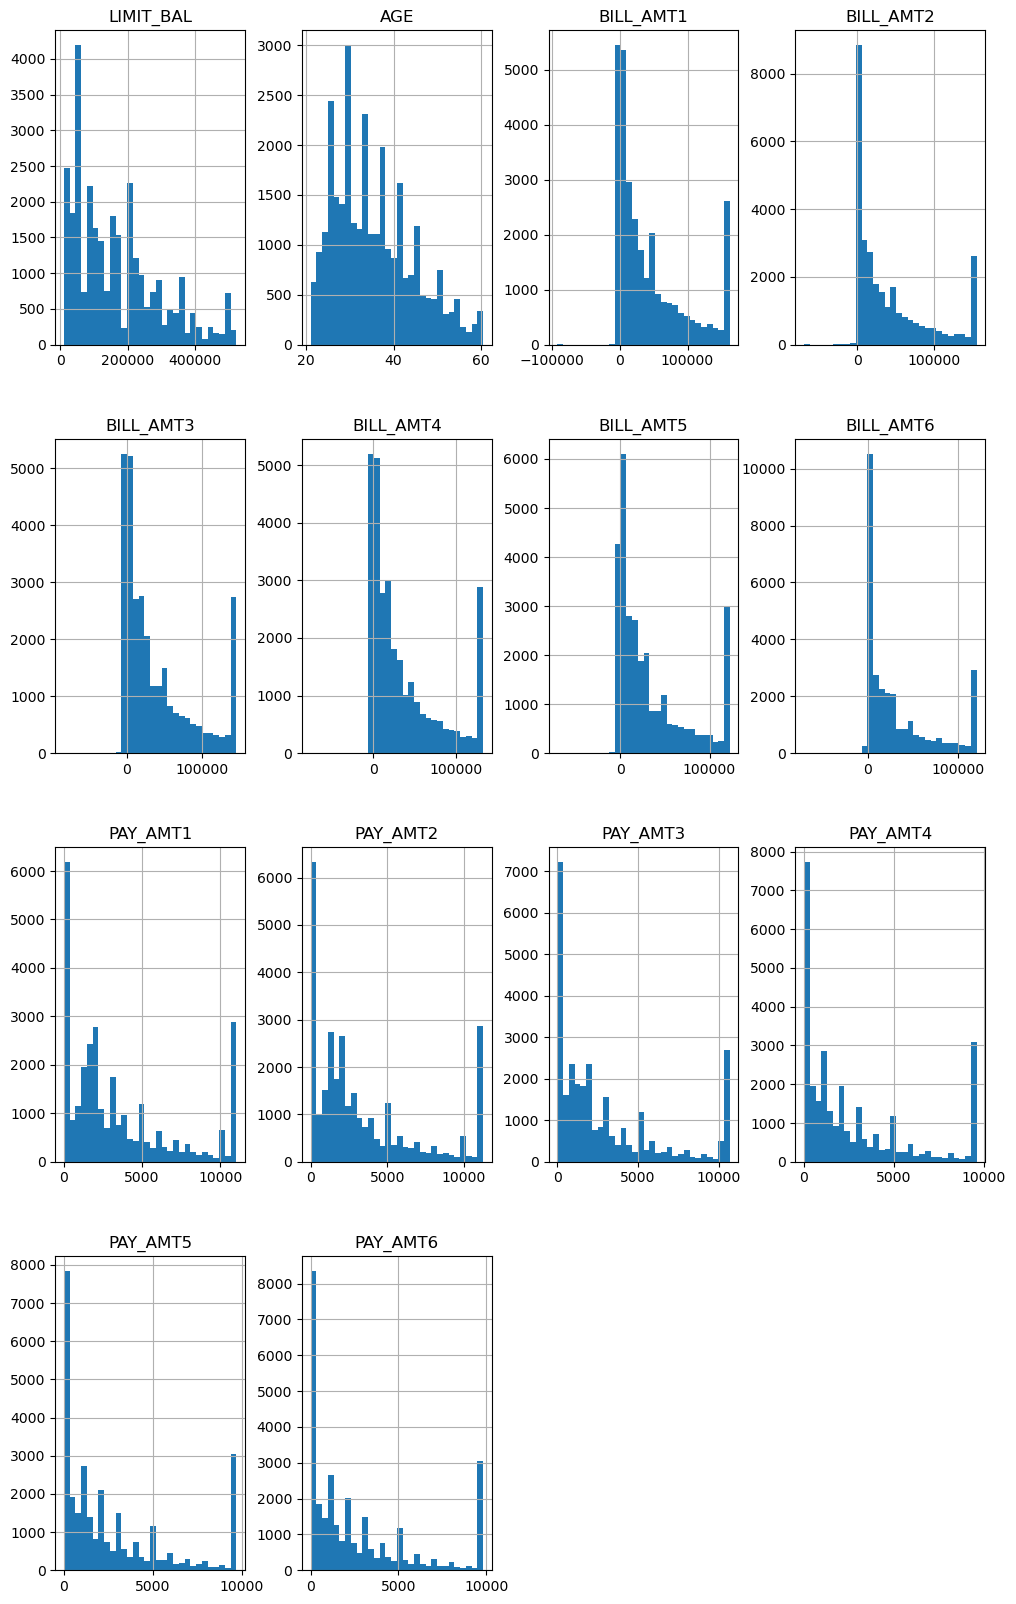

In [21]:
# Plot histograms before transformed features

df[outlier_fix_columns].hist(figsize=(12, 20), bins=30)
plt.show()

In [22]:
# Applying square root transformation to fix skewness of needed features

df[outlier_fix_columns] = np.sqrt(np.abs(df[outlier_fix_columns]) + 1)

In [23]:
print(df[outlier_fix_columns].skew())

LIMIT_BAL    0.247482
AGE          0.436065
BILL_AMT1    0.437944
BILL_AMT2    0.422110
BILL_AMT3    0.415432
BILL_AMT4    0.418846
BILL_AMT5    0.427006
BILL_AMT6    0.448018
PAY_AMT1     0.095435
PAY_AMT2     0.163805
PAY_AMT3     0.285515
PAY_AMT4     0.313511
PAY_AMT5     0.308738
PAY_AMT6     0.332968
dtype: float64


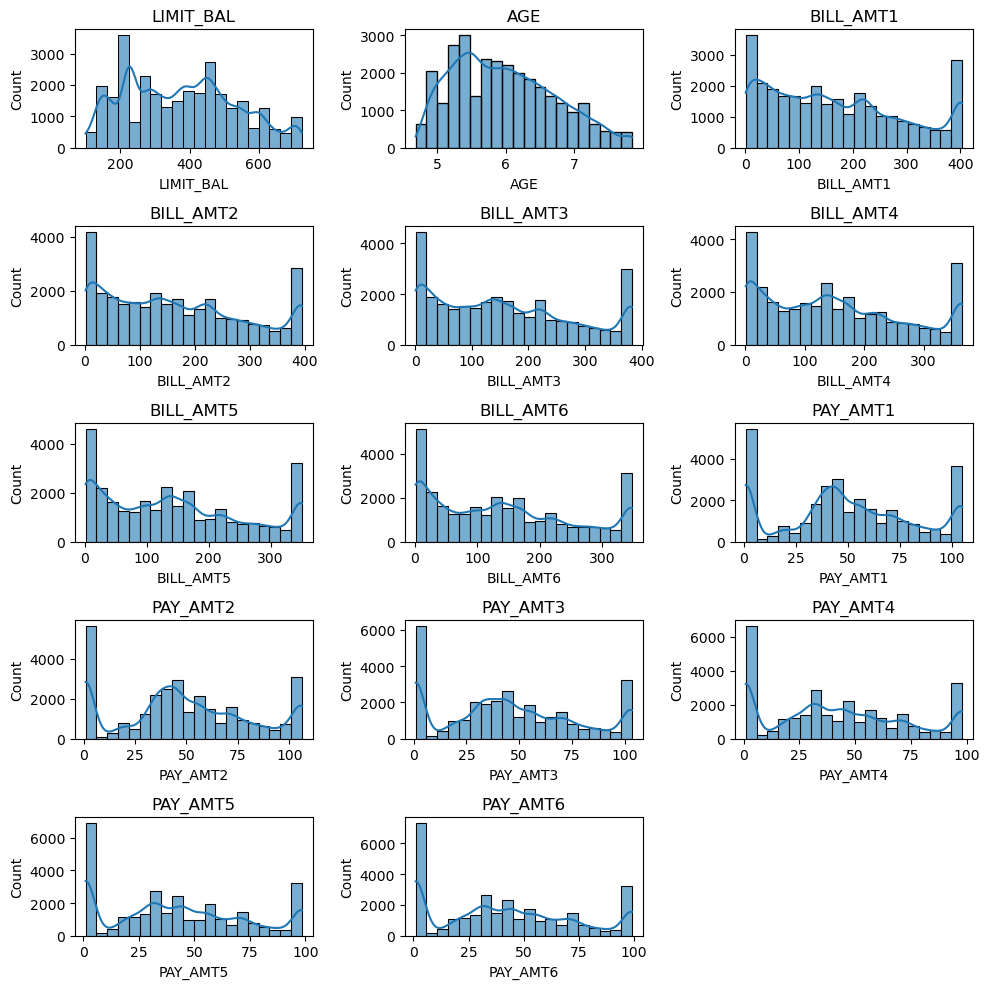

In [24]:
#Distribution plots for all numeric features
plt.figure(figsize=(10, 10))
for i, column in enumerate(outlier_fix_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data=df, x=column, kde=True, bins=20, alpha=0.6, legend=False)  # Set legend=False
    plt.title(column)
    plt.tight_layout()    
plt.show()

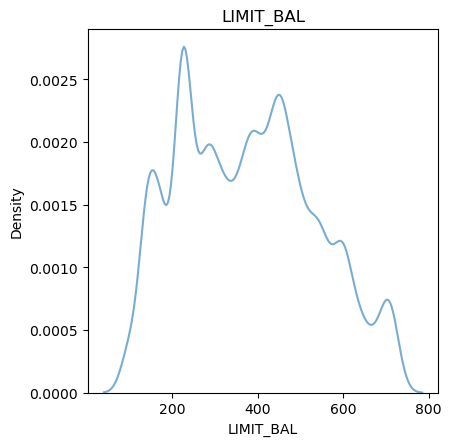

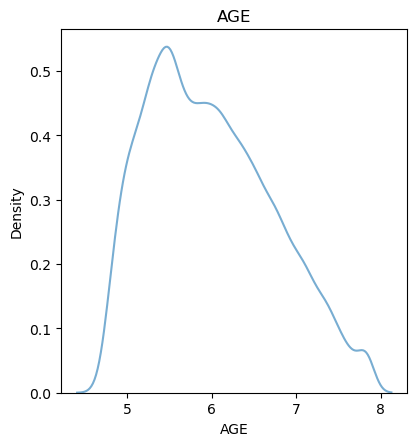

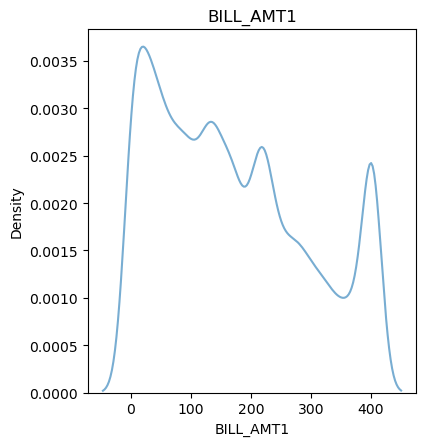

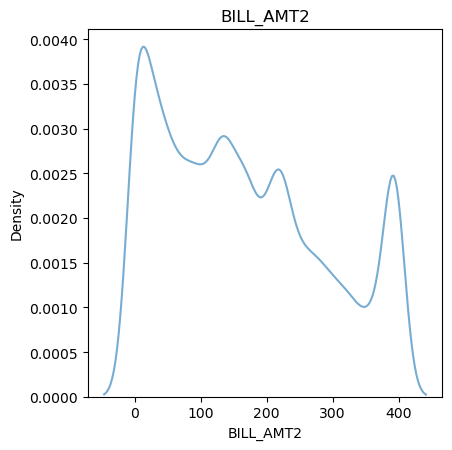

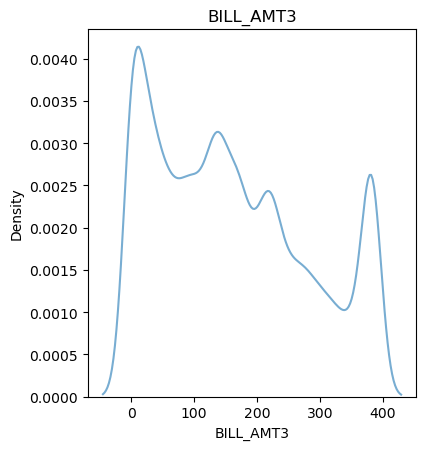

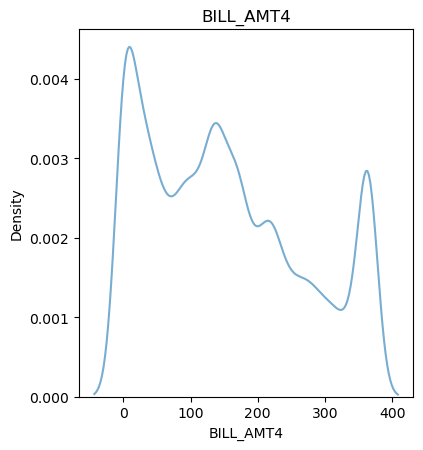

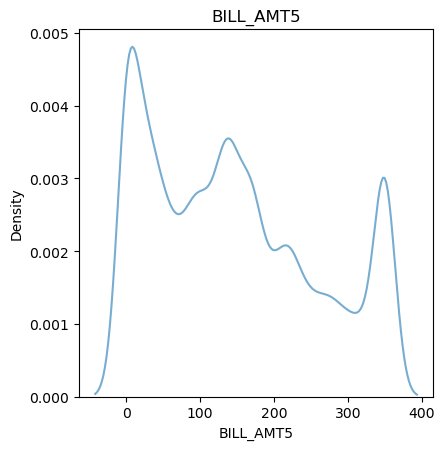

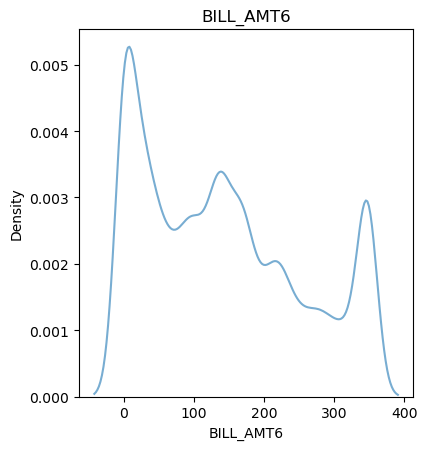

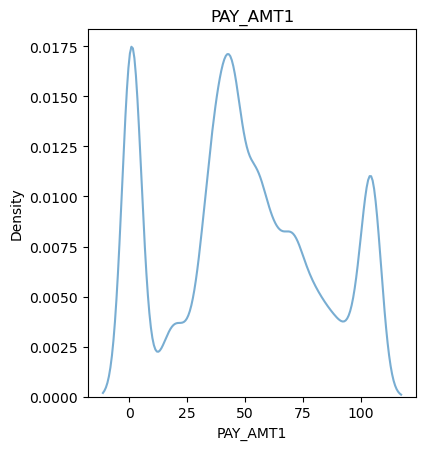

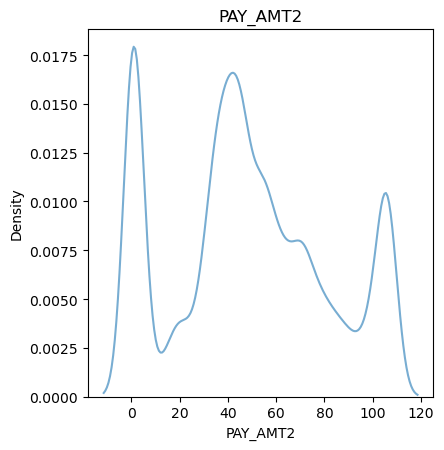

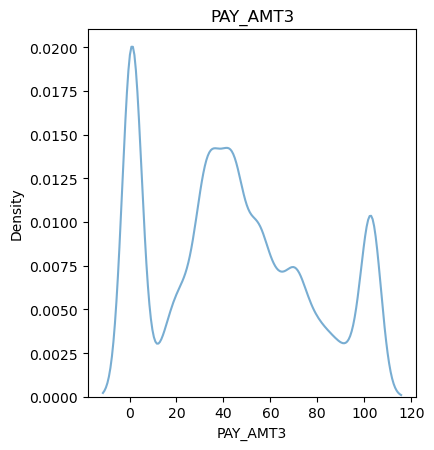

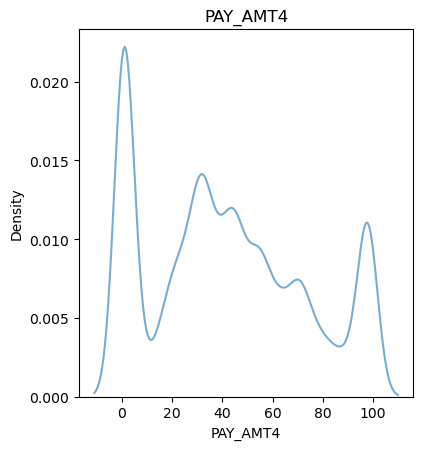

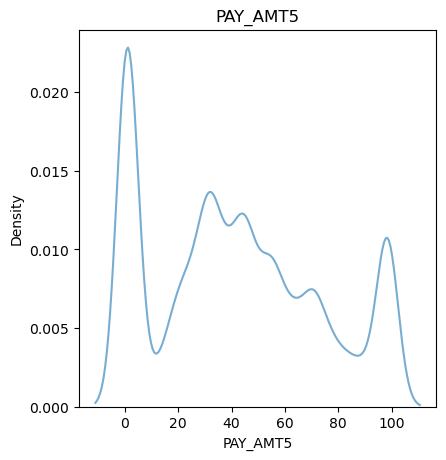

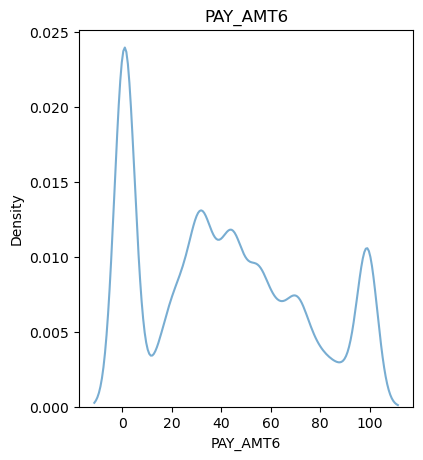

In [25]:

    
for i, column in enumerate(outlier_fix_columns, 1):
    plt.figure(figsize=(12, 21))
    plt.subplot(5, 3, i)
    sns.kdeplot(data=df, x=column, alpha=0.6, legend=False)  # Removed kde=True
    plt.title(column)
    plt.tight_layout()
plt.show()



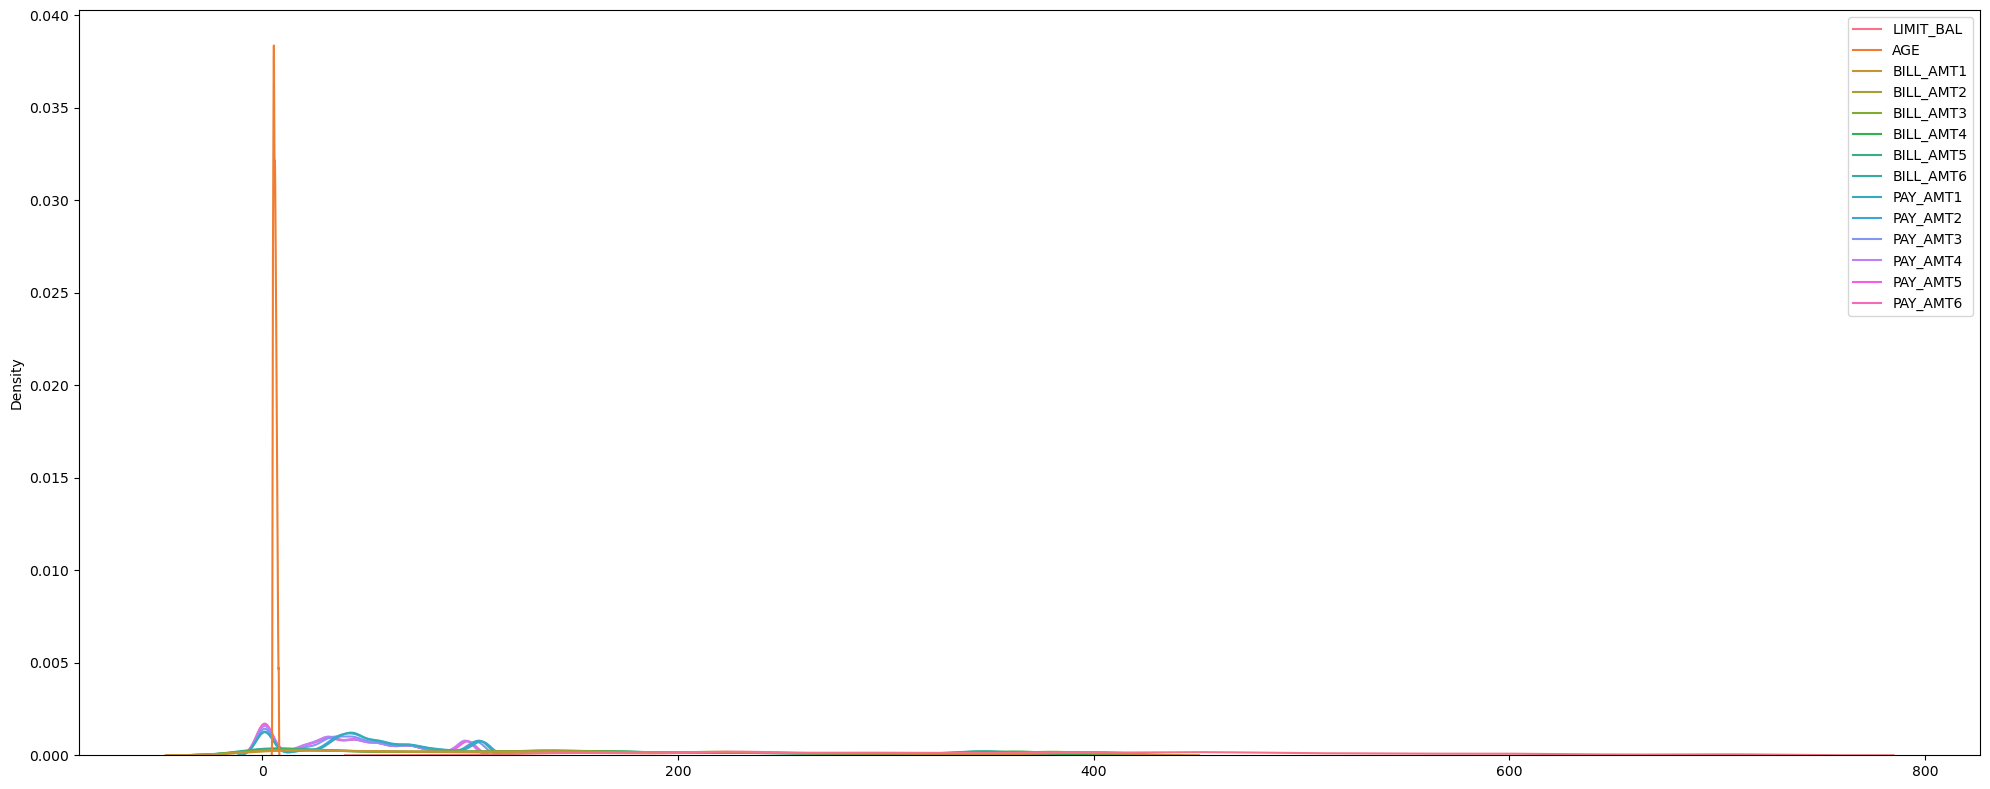

In [26]:
# Drawing KDE plot
plt.figure(figsize=(20,8))
sns.kdeplot(df[outlier_fix_columns])
plt.tight_layout()
plt.show()

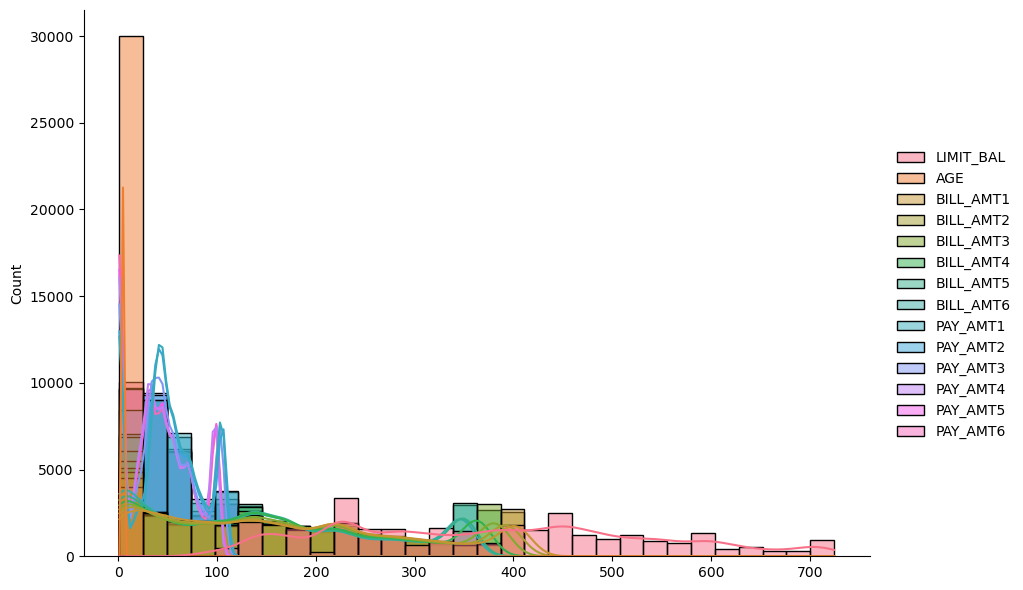

In [27]:
sns.displot(df[outlier_fix_columns], bins=30, kde=True, height=6, aspect=1.5)  # Create the distrib

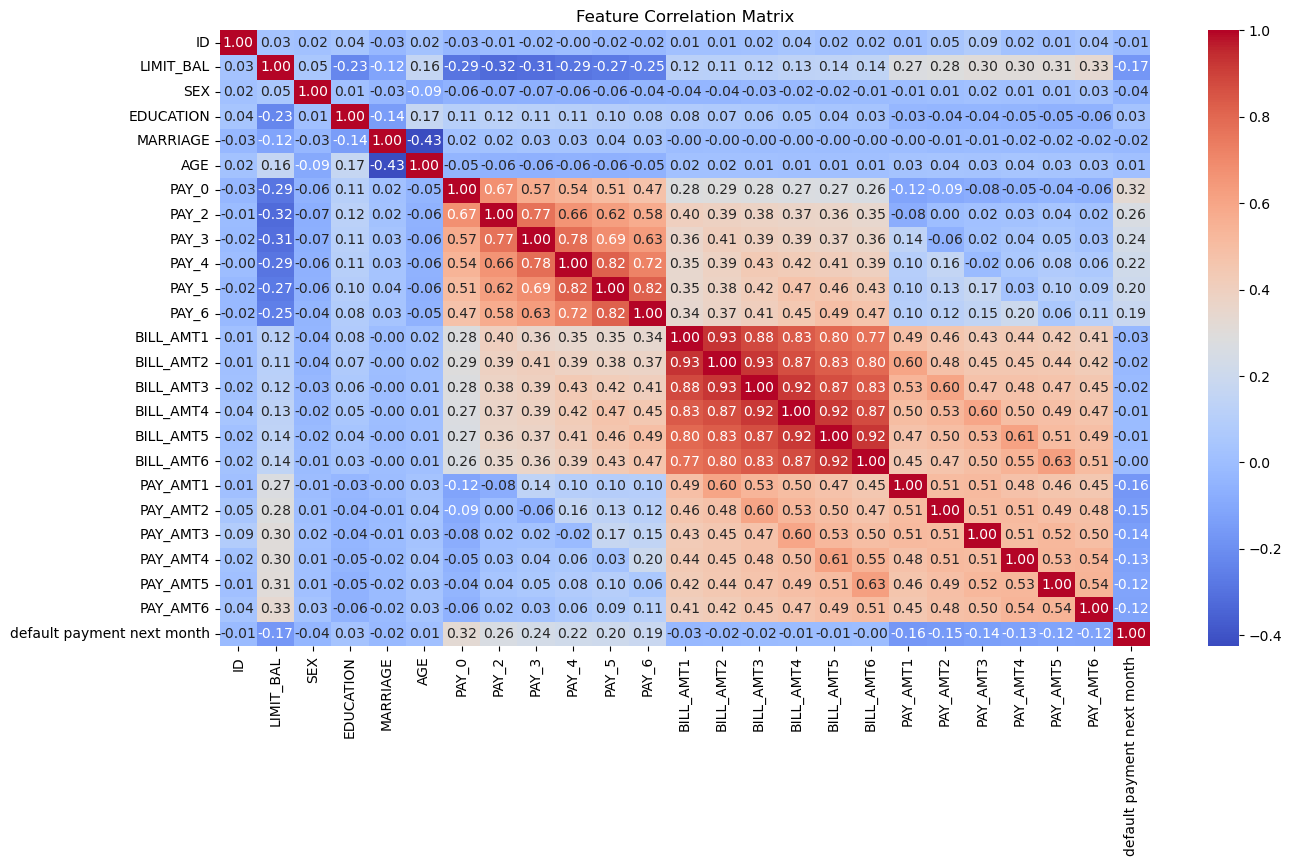

In [28]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [29]:
df['default payment next month'].unique()

array([1, 0], dtype=int64)

In [30]:
print(df['default payment next month'].value_counts())

default payment next month
0    23364
1     6636
Name: count, dtype: int64


EDUCATION: Education level(1 = Graduvate School, 2 = University,3 = High School, 4 = others,5=othes,6=others)



In [31]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

MARRIAGE: Marital status where 1 is married 2 is single 3 is others and 0 is unknown

In [32]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

SEX : Gender where 1 represent MALE and 2 represent FEMALE

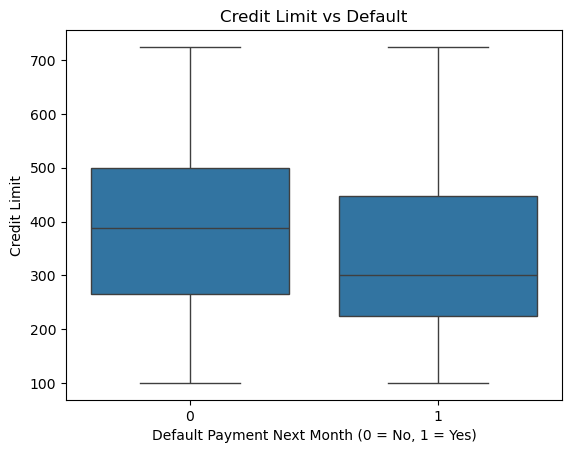

In [33]:
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title('Credit Limit vs Default')
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)')
plt.ylabel('Credit Limit')
plt.show()

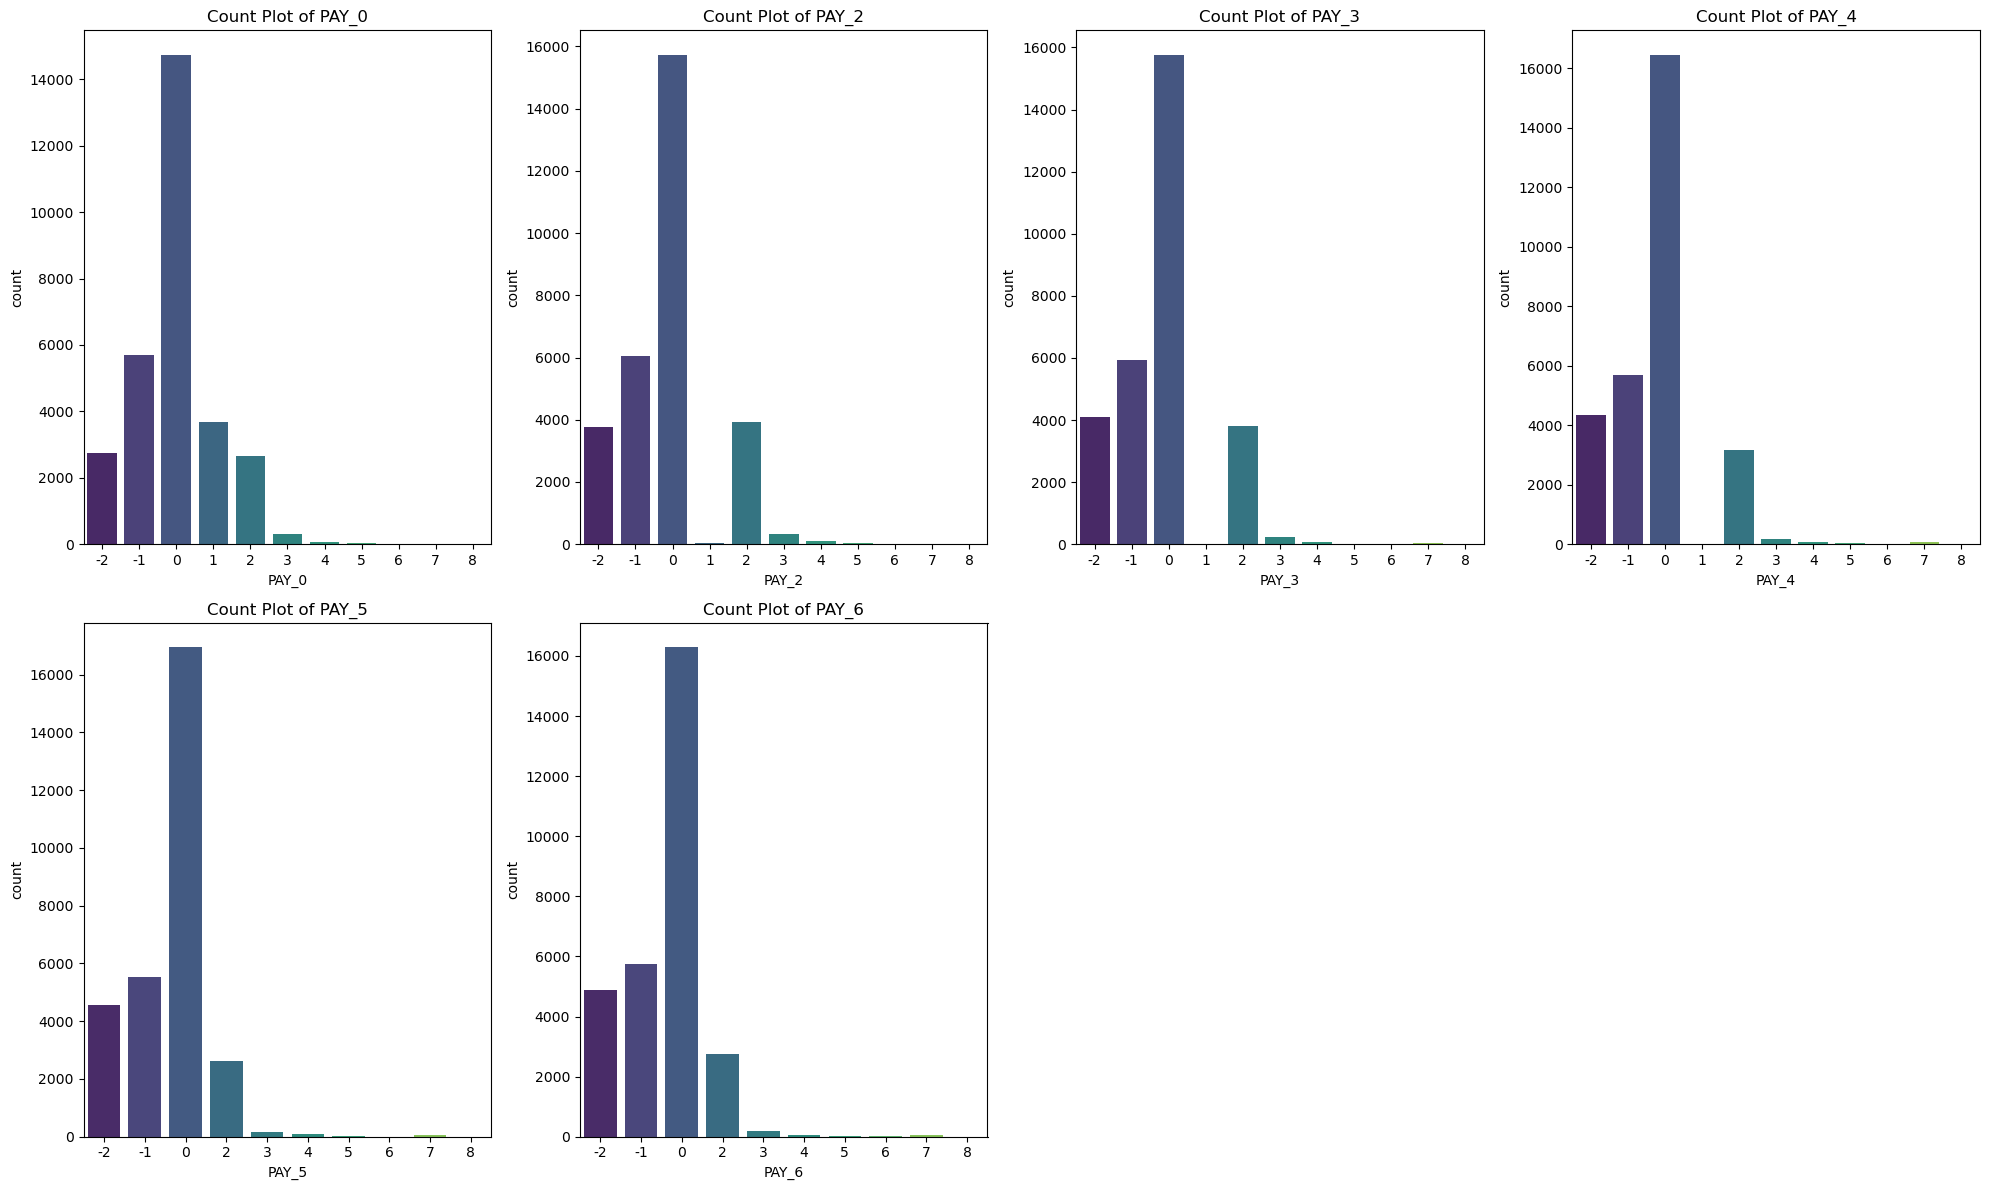

In [34]:
# Count Plot for status of  repayment 

# List of columns to plot
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


# Set the figure size
plt.figure(figsize=(20, 12))

# Loop through each PAY column and create a count plot
for i, column in enumerate(pay_columns):
    plt.subplot(2, 4, i + 1)  # Create a grid of subplots
    sns.countplot(x=df[column], palette="viridis")
    plt.title(f"Count Plot of {column}")

plt.tight_layout()  
plt.show()

plot shows predetermined values-1 = Fully paid, 1- 9 means delayed for 1-9 respectevely -2 = no payment 0 = no due '''

In [35]:
# Bill and Payment Columns
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


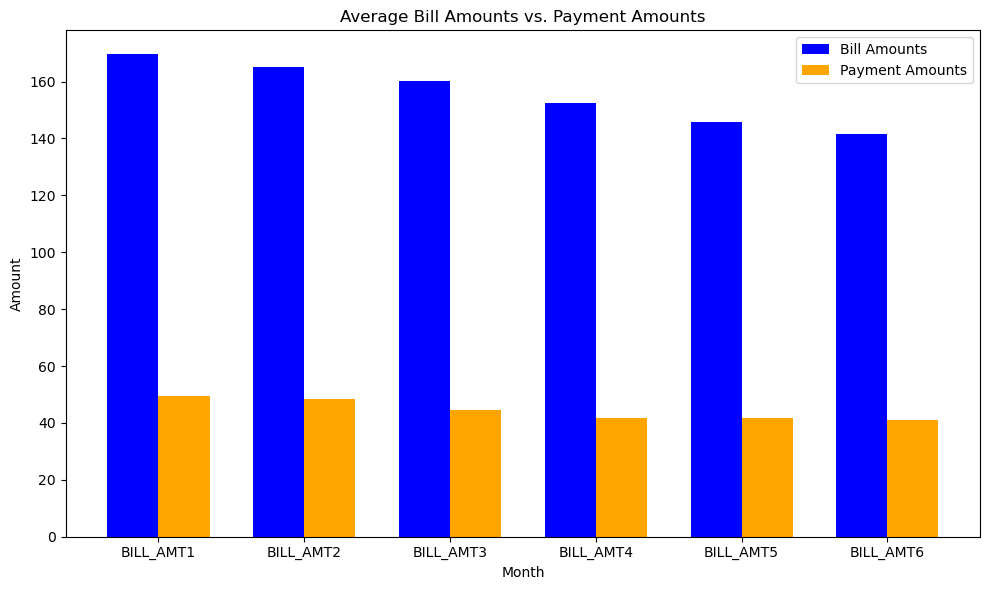

In [36]:
# Set the positions for the bars on the x-axis
x = np.arange(len(bill_columns))  # This creates an array from 0 to the number of columns (6 in this case)

# Define the width of the bars
width = 0.35  # Adjust to get enough space between bars

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the bill amounts as bars
plt.bar(x - width/2, df[bill_columns].mean(), width, label='Bill Amounts', color='blue')

# Plot the payment amounts as bars
plt.bar(x + width/2, df[pay_columns].mean(), width, label='Payment Amounts', color='orange')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Average Bill Amounts vs. Payment Amounts')
plt.xticks(x, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

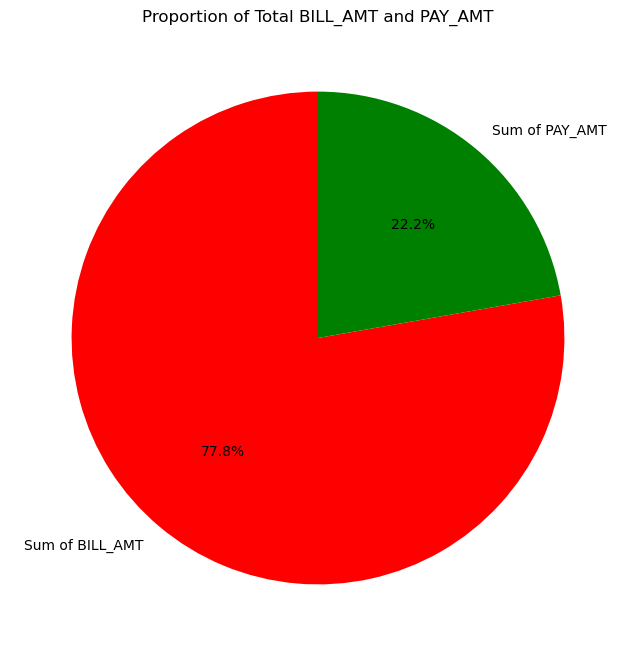

In [37]:
# Calculate the sum of all BILL_AMT and PAY_AMT columns
bill_amt_sum = df[bill_columns].sum().sum()  # Sum of all BILL_AMT columns
pay_amt_sum = df[pay_columns].sum().sum()  # Sum of all PAY_AMT columns

# Create a pie chart to show the proportion of each sum
labels = ['Sum of BILL_AMT', 'Sum of PAY_AMT']
sizes = [bill_amt_sum, pay_amt_sum]
colors = ['red', 'Green']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proportion of Total BILL_AMT and PAY_AMT")
plt.show()

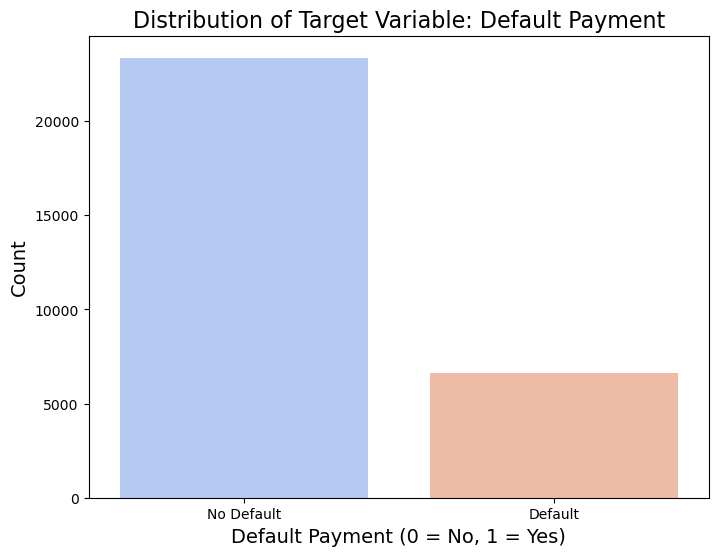

In [39]:
 #Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='default payment next month', data=df, palette='coolwarm')
plt.title("Distribution of Target Variable: Default Payment", fontsize=16)
plt.xlabel("Default Payment (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["No Default", "Default"])
plt.show()

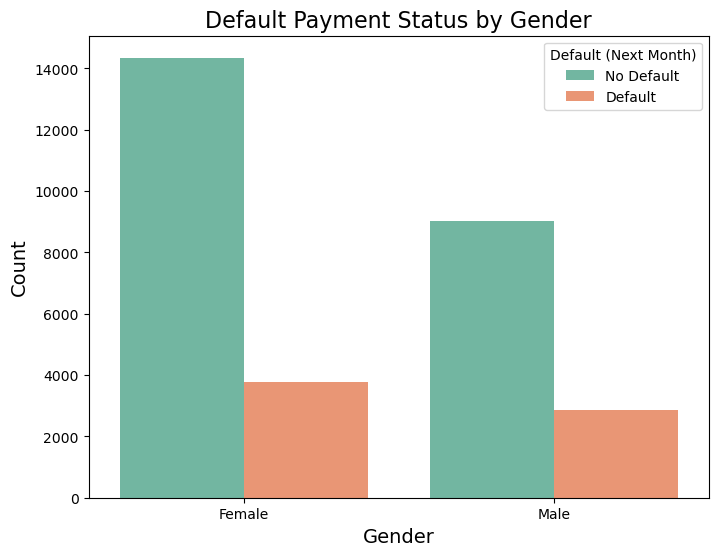

In [40]:
# Rename columns for easier handling if necessary (e.g., 'default payment next month' -> 'Default')
data.rename(columns={'default payment next month': 'Default', 'SEX': 'Gender'}, inplace=True)

# Map gender for better readability (1 = Male, 2 = Female)
data['Gender'] = data['Gender'].map({1: 'Male', 2: 'Female'})

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Default', palette='Set2')
plt.title('Default Payment Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Default (Next Month)', labels=['No Default', 'Default'])
plt.show()

feature selection 

Feature selection is a critical step in machine learning (ML) that involves selecting the most relevant features (input variables) for use in model building. The goal is to improve the performance of a model by reducing overfitting, improving accuracy, and reducing computational complexity.

In [41]:
X= [
     'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']
 

In [49]:
#splitting(train test)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Selection Using Random Forest Classifier

In this step, we use a Random Forest Classifier to perform feature selection by evaluating the importance of each feature based on how well it improves the prediction of default customer count.

Model Fitting:
We fit a Random Forest Classifier model to the training data. The model will automatically compute feature importance based on the contribution of each feature to the overall prediction accuracy.

Feature Importance:
The Random Forest algorithm assigns an importance score to each feature, reflecting its contribution to the model's predictive power. Features with higher importance scores are more influential in predicting the target variable.

Visualization:
A bar plot is generated to display the importance of each feature. Features with the highest scores will be ranked at the top, helping us understand which features play a critical role in predicting default customer.

In [45]:
#FEATURE SELECTION USING RAMDOMFOREST
rf = RandomForestClassifier(n_estimators=100,random_state=45,max_depth=5)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, random_state=45)

In [46]:
#Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

      Feature  Importance
6       PAY_0    0.286662
7       PAY_2    0.232695
8       PAY_3    0.098854
10      PAY_5    0.095550
11      PAY_6    0.054800
9       PAY_4    0.052648
18   PAY_AMT1    0.030453
20   PAY_AMT3    0.020827
1   LIMIT_BAL    0.019473
19   PAY_AMT2    0.018900
21   PAY_AMT4    0.013977
12  BILL_AMT1    0.010212
23   PAY_AMT6    0.009418
13  BILL_AMT2    0.008813
22   PAY_AMT5    0.008189
16  BILL_AMT5    0.007800
15  BILL_AMT4    0.007225
14  BILL_AMT3    0.005987
17  BILL_AMT6    0.005568
0          ID    0.005518
5         AGE    0.003023
3   EDUCATION    0.002225
4    MARRIAGE    0.000609
2         SEX    0.000576


In [47]:
# Select top 10 features
top_n_features = feature_importances.head(12)
print(f"Top 10 features: {top_n_features}")

Top 10 features:       Feature  Importance
6       PAY_0    0.286662
7       PAY_2    0.232695
8       PAY_3    0.098854
10      PAY_5    0.095550
11      PAY_6    0.054800
9       PAY_4    0.052648
18   PAY_AMT1    0.030453
20   PAY_AMT3    0.020827
1   LIMIT_BAL    0.019473
19   PAY_AMT2    0.018900
21   PAY_AMT4    0.013977
12  BILL_AMT1    0.010212


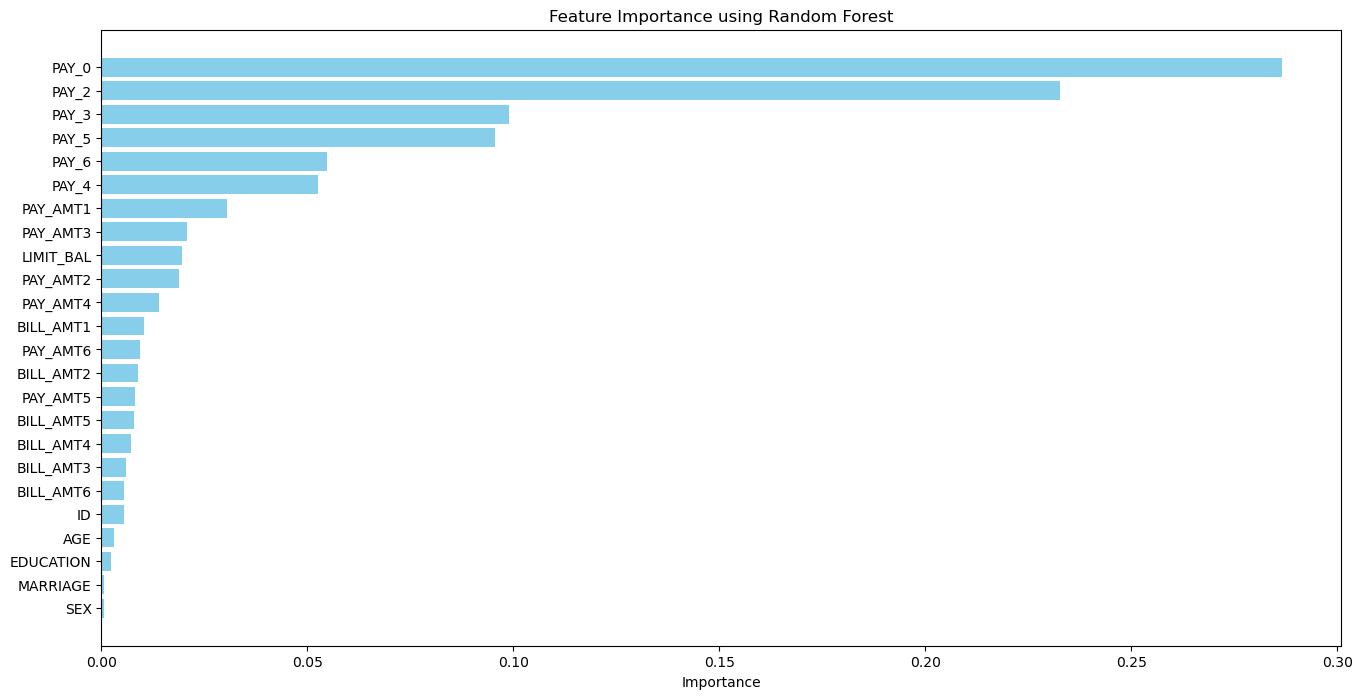

In [48]:
plt.figure(figsize=(16, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features on top
plt.show()

SPLIT DATA INTO TRAINING AND TESTING

Train-Test Splitting of Data
In this step, we split the dataset into training and testing sets to evaluate the performance of our machine learning models. The training set will be used to train the models, while the testing set will be used to assess how well the models generalize to unseen data.

We used an 80-20 split, where 80% of the data is used for training, and 20% is held back for testing. This ensures that the model has enough data to learn from while still being evaluated on unseen data to simulate real-world performance.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (24000, 24)
Testing Features Shape: (6000, 24)
Training Target Shape: (24000,)
Testing Target Shape: (6000,)


Feature Scaling

Feature scaling is an important step in the preprocessing pipeline, especially when working with algorithms that are sensitive to the scale of data following step applies StandardScaler from the sklearn.preprocessing module to standardize the features, ensuring they have a mean of 0 and a standard deviation of 1.

Standardization helps improve the convergence speed of optimization algorithms and ensures that all features contribute equally to the model.

In [50]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (24000, 24)
X_test_scaled shape: (6000, 24)


Model Building and Training

In this step, we will build and train multiple Classification models on the training dataset. The models will be trained using the features selected during preprocessing, and their performance will be evaluated based on various metrics. The following models will be trained:

Logistic Regression:
Logistic Regression assumes a linear relationship between the independent features and the log-odds of the target variable. It is effective for binary classification problems.

Support Vector classifier (SVC):
To classify data points by finding the optimal hyperplane that maximizes the margin between different classes.

Random Forest classifier:
An ensemble method that builds multiple decision trees and aggregates their results, which helps improve prediction accuracy and reduces overfitting.

Gradient Boosting classifier:
An ensemble model that builds trees sequentially, focusing on correcting the errors made by previous trees, improving the overall accuracy of predictions.

Decision Tree classifier:
A model that creates a tree-like structure by splitting the data based on the features to predict the target variable.

K-Nearest Neighbors (K-NN) Classifier:
K-NN is a simple and effective non-parametric algorithm used for both classification and regression tasks. It predicts the class of a data point based on the classes of its nearest neighbors. 

Each model will be fitted to the training data and evaluated using performance metrics such as Accuracy, precision, Recall, F1-score, support.

MODEL BUILDING



In [51]:
# Models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-NN': KNeighborsClassifier(),
    'GradientBoostingClassifier' :GradientBoostingClassifier(random_state=42),
    
}

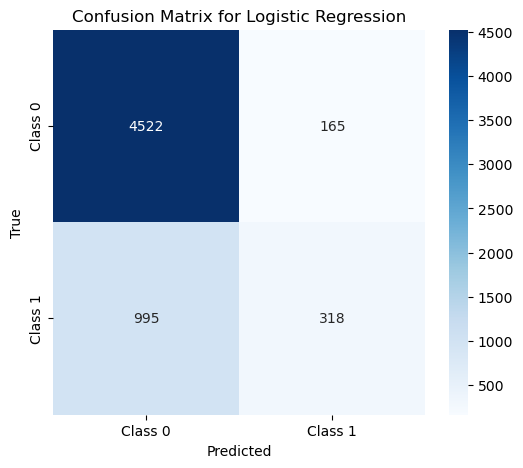

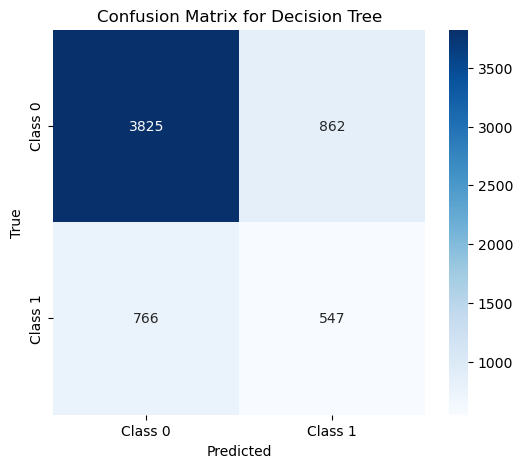

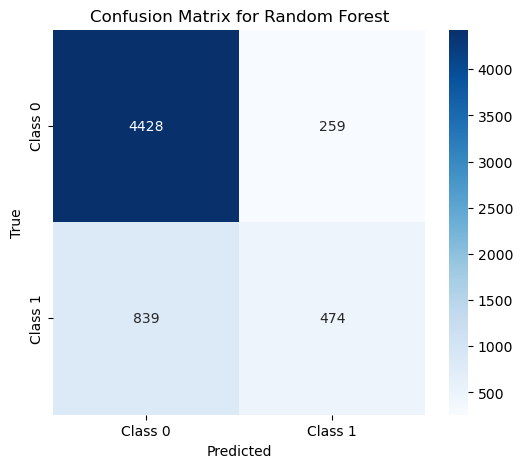

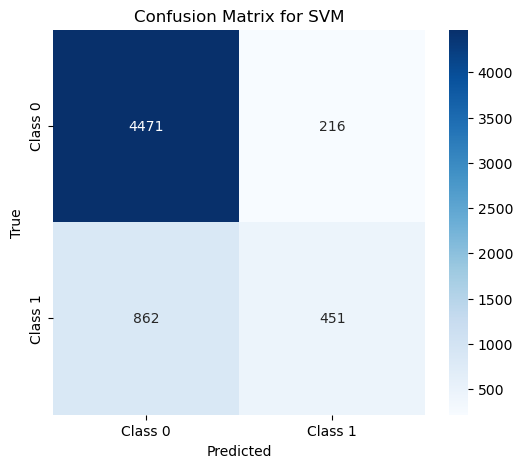

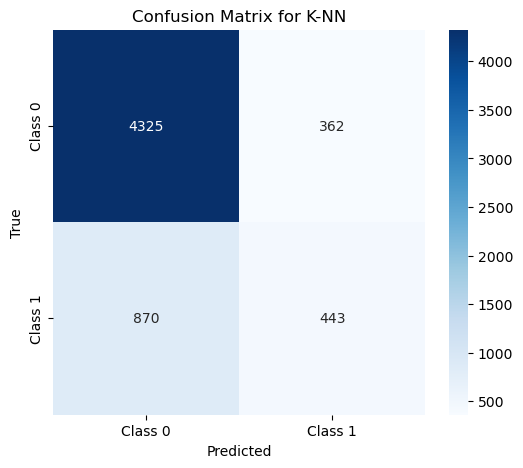

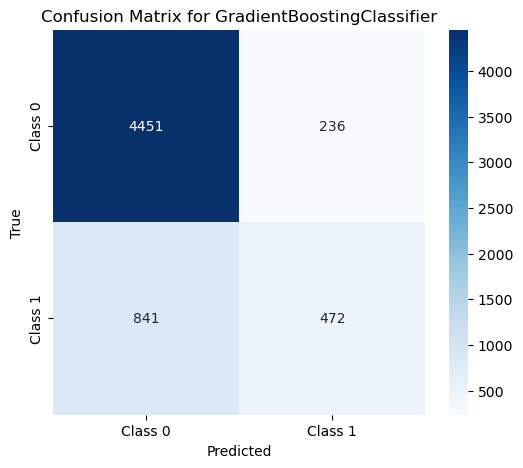


Logistic Regression:
Accuracy: 0.8067
Confusion Matrix:
[[4522  165]
 [ 995  318]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4687
           1       0.66      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.60      0.62      6000
weighted avg       0.78      0.81      0.77      6000


Decision Tree:
Accuracy: 0.7287
Confusion Matrix:
[[3825  862]
 [ 766  547]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4687
           1       0.39      0.42      0.40      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.73      0.73      6000


Random Forest:
Accuracy: 0.8170
Confusion Matrix:
[[4428  259]
 [ 839  474]]
Classification Report:
              precision    recall  f1

In [53]:
results = {}

# Train, evaluate, and store results for each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_scaled)

   
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    cr = classification_report(y_test, y_pred)
    
    # Storing results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    
     # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Printing results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

In [54]:
# Print results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}")

Model Performance:
Logistic Regression: Accuracy = 0.8067
Decision Tree: Accuracy = 0.7287
Random Forest: Accuracy = 0.8170
SVM: Accuracy = 0.8203
K-NN: Accuracy = 0.7947
GradientBoostingClassifier: Accuracy = 0.8205


In [55]:
best_model_name = max(results, key=lambda model: results[model]['Accuracy'])
best_model_accuracy = results[best_model_name]['Accuracy']

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

The best model is GradientBoostingClassifier with an accuracy of 0.8205


Hyperperameter Tuning



Hyperparameter Tuning for the Best Model: Gradient Boosting classifier.
To enhance the performance of Gradient Boosting classifier, we will perform hyperparameter tuning using GridSearchCV. Hyperparameter tuning allows us to find the optimal combination of parameters that maximize the model’s predictive accuracy and generalization ability.

The following hyperparameters will be tuned:
n_estimators:
    Number of trees in the forest. Higher values generally improve performance but increase computation time.   max_featur
    Number of features to consider for the best split:
        'sqrt': Square root of the total number of features.
        'log2': Logarithm base 2 of the total number of features.
         None: Use all feat.

    mapth:
    Maximum depth of each tree. Controls the complexity of the model:
        Larger values: Risk overfitting.
        Smaller values: Risk undtting.

    min_ses_split:
    Minimum number of samples required to split an  node:
        Larger values reduce the size of the tree, making it less likeo overfit.

    samples_leaf:
    Minimum number of samples required to be at a leaf node:
     f  L generalization prom
eneralizati

    subsample:
    Fraction of the dataset used for training each tree (specific to Gradient Boosting, not Random Forest). For Random Forest, this pr ng Rented Bike Count.



In [69]:
# Define the model
model = GradientBoostingClassifier(random_state=42)

In [57]:
# Define the parameter distribution
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}


In [50]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_score_

# Best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}
Best Cross-Validation Score: 0.82225


In [ ]:
Evaluation after Hyperparameter Tuning

In [58]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

In [59]:
# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)

# Print Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8198
Confusion Matrix:
[[4454  233]
 [ 848  465]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Create Pipeline

Creating and Saving Pipeline
In this step, we will create a Pipeline that includes feature scaling, model training, and handling missing values with a Simple Imputer. The Simple Imputer will fill in missing data, ensuring that the dataset is complete and ready for training.

The pipeline will consist of the following steps:

Simple Imputer:
The imputer will handle any missing values in the dataset by filling them with the median of the respective columns. This is a common strategy for numerical features to prevent errors during model training.

Feature Scaling:
StandardScaler will be applied to scale the features, ensuring that all variables have a mean of 0 and a standard deviation of 1 before they are input into the model.

Gradient boosting Classifier:
The Gradient boosting Classifier will be used as the final model in the pipeline, where it will be trained on the scaled features to predict Default Customer.

Once the pipeline is created and trained, we will save it using joblib, allowing us to reload the trained pipeline for future predictions or evaluation. This ensures that the entire preprocessing and model training process can be easily reused without any manual intervention.

In [60]:
 # Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),                # Standardize features
    ('model', GradientBoostingClassifier())      # Model
])


In [54]:
# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)

# Make predictions using the test data (it automatically applies the scaling)
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8213
Confusion Matrix:
[[4455  232]
 [ 840  473]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [61]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

Save the Model

In [62]:
# Save the fitted pipeline to a file
joblib.dump(pipeline, 'best_model_pipeline_main.pkl')

['best_model_pipeline_main.pkl']

TEST WITH UNSEEN DATA


After training the model and performing hyperparameter tuning, the final step is to evaluate the model's performance on unseen data. Testing with unseen data is crucial as it simulates real-world scenarios where the model is applied to data it hasn't encountered before.

Here’s the process:

Load the Saved Pipeline:
We will load the trained pipeline that includes the Simple Imputer, StandardScaler, and Gradient Boosting Classifier. This ensures that the preprocessing steps and model are applied consistently.

Prepare the Unseen Data:
The unseen data will be preprocessed in the same way as the training data, ensuring that it is cleaned, scaled, and imputed for missing values.

Predict on Unseen Data:
Using the trained model, we will make predictions on the unseen test data (or new data), and compare the predicted values with the actual values to assess the model’s performance.

Evaluate Performance:
We will evaluate the performance on the unseen data using metrics such as Accuracy, precision, Recall, F1-score, support. This helps us understand how well the model generalizes to new, unseen data.

Testing with unseen data is essential to ensure the robustness and reliability of the trained model before deploying it for real-world use.



In [ ]:
loaded_pipeline = joblib.load('best_model_pipeline_main.pkl')

In [71]:
df_unseen = pd.read_csv('unseendata.csv')
df_unseen.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,120000,2,2,1,30,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,20000,2,2,2,20,-1,2,0,0,0,...,2272,4455,3261,0,2000,1000,1500,0,2500,0
2,650000,2,2,2,40,0,0,0,0,0,...,6500,6500,2870,1000,6500,6500,6500,2870,0,0
3,50000,2,2,1,25,0,0,0,0,0,...,28414,28859,25547,3000,2519,2200,1000,1569,1000,1
4,40000,1,2,1,43,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,60000,1,1,2,67,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,310000,1,1,1,32,0,0,0,0,0,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,1
7,600000,1,1,2,70,0,-1,-1,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,550000,2,3,1,50,0,0,2,0,0,...,445007,473955,56000,36000,40000,39000,21239,13450,15000,0
9,200000,2,2,2,65,-2,-2,-2,-2,-1,...,221,-159,567,380,601,0,581,1687,1542,0


In [74]:
df_unseen.info

<bound method DataFrame.info of     LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      120000    2          2         1   30      2      2     -1     -1   
1       20000    2          2         2   20     -1      2      0      0   
2      650000    2          2         2   40      0      0      0      0   
3       50000    2          2         1   25      0      0      0      0   
4       40000    1          2         1   43     -1      0     -1      0   
5       60000    1          1         2   67      0      0      0      0   
6      310000    1          1         1   32      0      0      0      0   
7      600000    1          1         2   70      0     -1     -1      0   
8      550000    2          3         1   50      0      0      2      0   
9      200000    2          2         2   65     -2     -2     -2     -2   
10     130000    2          3         1   55      0      0      2      0   
11      30000    1          3         2   45     -1     

In [77]:
df.shape

(30000, 25)

In [79]:
# Define target and feature variable of unseen data
X_unseen = df_unseen.drop('default payment next month', axis=1)  # Drop the target column
y_actual = df_unseen['default payment next month']  # The true target labels


In [80]:
X = df[['PAY_0', 'AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1',
        'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT2', 'BILL_AMT6']]

# Split the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (24000, 10)
Testing Features Shape: (6000, 10)
Training Target Shape: (24000,)
Testing Target Shape: (6000,)


In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (24000, 10)
X_test_scaled shape: (6000, 10)


In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Using 100 trees
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
Displaying predicted value and original value

In [89]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [95]:
y_actual=y_test

In [ ]:
compare predicted and actual values

In [98]:
# Assuming `y_test` contains actual values and `y_pred` contains predicted values
# y_test: Actual target values from your test data
# y_pred: Predictions made by your trained model

# Create a DataFrame for comparison
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the results
print(results.head())

       Actual  Predicted
2308        0          0
22404       0          0
23397       0          0
25058       0          0
2664        1          0


In [99]:
# Accuracy
accuracy = accuracy_score(y_actual, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_actual, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_actual, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4687
           1       0.61      0.34      0.44      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix:
[[4405  282]
 [ 868  445]]


In [104]:
Evaluvating model

# Assuming y_test contains actual labels and rf_model is the trained Random Forest model

# Predicted probabilities for the positive class (class 1)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

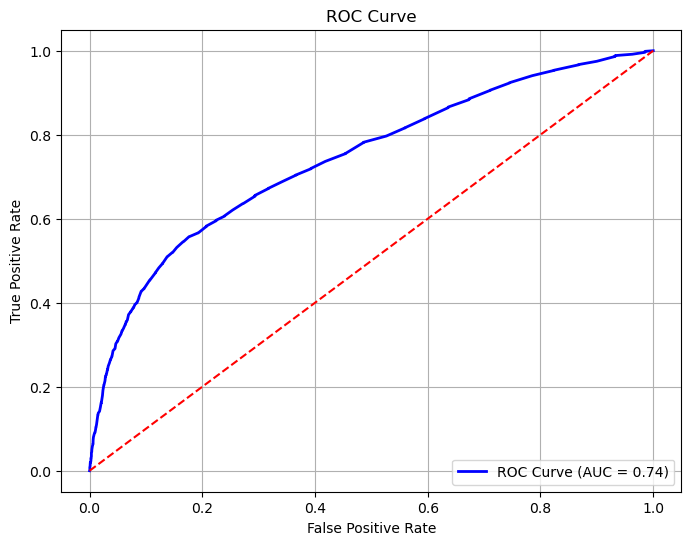

In [105]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Conclusion

The project successfully developed a predictive model to identify credit card payment defaults. 
The Gradient Boosting Classifier emerged as the best-performing model, achieving an accuracy82.of.22% after hyperparameter tuning.
However, despite its strong precision for predicting non-defaults, the model exhibited low recall for the minority class (defaults),
highlighting challenges with class anceimbal

Model Performance

    Best Model: Gradient Boosting Classifier
    Accuracy: 82.22% (after hyperparameter tuning with GridSearchCV)
    Precision for Non-Defaults: 0.84
    Recall for Defaults6 0.35
While the model demonstrates high overall accuracy, its limited ability to identify defaults suggests a bias toward the majority 

Limitations

    Imbalanced Dataset: Non-default cases significantly outnumber defaults, leading to lower recall for the minority class.
    Model Bias: The model struggles to identify true defaults, which are critical for credit risk management.
    Generalizability: Limited performance on unseen data highlights the need for improved techniques to addrencess class imbala

    future Improvements

    Address Class Imbalance:
        Implement oversampling techniques like SMOTE or undersampling for balancing the dataset.
        Adjust class weights in the model to improve sensitivity to defaults.

    Advanced Techniques:
        Explore deep learning methods such as neural networks or LSTMs to capture complex patterns in the data.

    Feature Engineering:
        Develop new features that provide deeper insights into payment behaviors.
        Refine existing features for better predictive power.

    Real-World Deployment:
        Build a robust system to integrate the model into financial institutions, focusing on early default predd applications.nce.
class.ance.